# Ejercicio 4.4 (home)


En la inmobiliaria FeelGood han recopilado datos de precios de las casas que han
vendido últimamente.

Les gustaría poder predecir el precio de una casa a partir de los datos que disponen sobre
características de la casa y del barrio donde está situada. Así pueden dar ya un primer
precio de venta sin tener que llevar un tasador.

Las variables que vamos a usar son:
* ID --> Identificador de la casa
* crim --> Tasa de criminalidad per cápita por ciudad.
* zn --> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
* indus --> Proporción de acres de negocios no minoristas por ciudad.
* chas --> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
* nox --> Concentración de óxidos de nitrógeno (partes por 10 millones).
* rm --> Número medio de habitaciones por vivienda.
* age --> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* dis --> Media ponderada de las distancias a cinco centros de empleo de Boston.
* rad --> Indice de accesibilidad a carreteras radiales.
* tax --> Impuesto sobre el valor total de la propiedad por 10.000 dólares.
* ptratio --> Proporción de alumnos por maestro por ciudad.
* black --> 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad.
* lstat --> Vn estatus más bajo de la población (porcentaje).
* medv --> Valor medio de las casas ocupadas por sus dueños en \ 1000 dólares. Será la variable target a predecir

Tenemos 4 ficheros:
* 2 train
* 2 predict

Primero tendremos que hacer un proceso de ETL ya que los datos de la casa están
separados de los datos del barrio (juntar los dos train entre ellos y los dos test entre ellos)
En predict, no tenemos la variable medv, que es la que tenemos que dar como respuesta

## 1.- Importar las librerías de Python necesarias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

## 2.- Proceso de ETL

### Carga de los ficheros de manera individual

In [2]:
PATH_NAME = './data/'
FILE_NAME1 = 'train_1.csv'
FILE_NAME2 = 'train_2.csv'
FILE_NAME3 = 'predict_1.csv'
FILE_NAME4 = 'predict_2.csv'

In [3]:
train1 = pd.read_csv(PATH_NAME+FILE_NAME1, sep=",")
train2 = pd.read_csv(PATH_NAME+FILE_NAME2, sep=",")
predict1 = pd.read_csv(PATH_NAME+FILE_NAME3, sep=",")
predict2 = pd.read_csv(PATH_NAME+FILE_NAME4, sep=",")

### Análisis de los datos por fichero

#### Train1

In [4]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv
0      1  18.0     0  6.575  4.0900    1  296  24.0
1      2   0.0     0  6.421  4.9671    2  242  21.6
2      4   0.0     0  6.998  6.0622    3  222  33.4
3      5   0.0     0  7.147  6.0622    3  222  36.2
4      7  12.5     0  6.012  5.5605    5  311  22.9
..   ...   ...   ...    ...     ...  ...  ...   ...
328  500   0.0     0  5.569  2.3999    6  391  17.5
329  502   0.0     0  6.593  2.4786    1  273  22.4
330  503   0.0     0  6.120  2.2875    1  273  20.6
331  504   0.0     0  6.976  2.1675    1  273  23.9
332  506   0.0     0  6.030  2.5050    1  273  11.9

[333 rows x 8 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
medv    float64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
medv    0
dtype: int64 

Indices estadisticos

                ID          zn      

#### Train2

In [5]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train2.duplicated().any())

Vista del DF

       ID     crim  indus    nox   age  ptratio   black  lstat
0      1  0.00632   2.31  0.538  65.2     15.3  396.90   4.98
1      2  0.02731   7.07  0.469  78.9     17.8  396.90   9.14
2      4  0.03237   2.18  0.458  45.8     18.7  394.63   2.94
3      5  0.06905   2.18  0.458  54.2     18.7  396.90   5.33
4      7  0.08829   7.87  0.524  66.6     15.2  395.60  12.43
..   ...      ...    ...    ...   ...      ...     ...    ...
328  500  0.17783   9.69  0.585  73.5     19.2  395.77  15.10
329  502  0.06263  11.93  0.573  69.1     21.0  391.99   9.67
330  503  0.04527  11.93  0.573  76.7     21.0  396.90   9.08
331  504  0.06076  11.93  0.573  91.0     21.0  396.90   5.64
332  506  0.04741  11.93  0.573  80.8     21.0  396.90   7.88

[333 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

 ID       

#### Predict1

In [6]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax
0      3   0.0     0  7.185  4.9671    2  242
1      6   0.0     0  6.430  6.0622    3  222
2      8  12.5     0  6.172  5.9505    5  311
3      9  12.5     0  5.631  6.0821    5  311
4     10  12.5     0  6.004  6.5921    5  311
..   ...   ...   ...    ...     ...  ...  ...
168  496   0.0     0  5.670  2.7986    6  391
169  497   0.0     0  5.390  2.7986    6  391
170  499   0.0     0  6.019  2.4091    6  391
171  501   0.0     0  6.027  2.4982    6  391
172  505   0.0     0  6.794  2.3889    1  273

[173 rows x 7 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
dtype: int64 

Indices estadisticos

                ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.00000

#### Predict 2

In [7]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict2.duplicated().any())

Vista del DF

       ID     crim  indus    nox    age  ptratio   black  lstat
0      3  0.02729   7.07  0.469   61.1     17.8  392.83   4.03
1      6  0.02985   2.18  0.458   58.7     18.7  394.12   5.21
2      8  0.14455   7.87  0.524   96.1     15.2  396.90  19.15
3      9  0.21124   7.87  0.524  100.0     15.2  386.63  29.93
4     10  0.17004   7.87  0.524   85.9     15.2  386.71  17.10
..   ...      ...    ...    ...    ...      ...     ...    ...
168  496  0.17899   9.69  0.585   28.8     19.2  393.29  17.60
169  497  0.28960   9.69  0.585   72.9     19.2  396.90  21.14
170  499  0.23912   9.69  0.585   65.3     19.2  396.90  12.92
171  501  0.22438   9.69  0.585   79.7     19.2  396.90  14.33
172  505  0.10959  11.93  0.573   89.3     21.0  393.45   6.48

[173 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

### Unificar DataFrames "Train" y "Predict"

#### Train

In [8]:
train = pd.merge(train1,train2,how='inner', on='ID', validate='1:1')
train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [9]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv     crim  indus    nox  \
0      1  18.0     0  6.575  4.0900    1  296  24.0  0.00632   2.31  0.538   
1      2   0.0     0  6.421  4.9671    2  242  21.6  0.02731   7.07  0.469   
2      4   0.0     0  6.998  6.0622    3  222  33.4  0.03237   2.18  0.458   
3      5   0.0     0  7.147  6.0622    3  222  36.2  0.06905   2.18  0.458   
4      7  12.5     0  6.012  5.5605    5  311  22.9  0.08829   7.87  0.524   
..   ...   ...   ...    ...     ...  ...  ...   ...      ...    ...    ...   
328  500   0.0     0  5.569  2.3999    6  391  17.5  0.17783   9.69  0.585   
329  502   0.0     0  6.593  2.4786    1  273  22.4  0.06263  11.93  0.573   
330  503   0.0     0  6.120  2.2875    1  273  20.6  0.04527  11.93  0.573   
331  504   0.0     0  6.976  2.1675    1  273  23.9  0.06076  11.93  0.573   
332  506   0.0     0  6.030  2.5050    1  273  11.9  0.04741  11.93  0.573   

      age  ptratio   black  lstat  
0    65.2   

#### Predict

In [10]:
predict = pd.merge(predict1, predict2, how='inner', on='ID', validate='1:1')
predict

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.0,0,5.670,2.7986,6,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,497,0.0,0,5.390,2.7986,6,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,499,0.0,0,6.019,2.4091,6,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,501,0.0,0,6.027,2.4982,6,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [11]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax     crim  indus    nox    age  \
0      3   0.0     0  7.185  4.9671    2  242  0.02729   7.07  0.469   61.1   
1      6   0.0     0  6.430  6.0622    3  222  0.02985   2.18  0.458   58.7   
2      8  12.5     0  6.172  5.9505    5  311  0.14455   7.87  0.524   96.1   
3      9  12.5     0  5.631  6.0821    5  311  0.21124   7.87  0.524  100.0   
4     10  12.5     0  6.004  6.5921    5  311  0.17004   7.87  0.524   85.9   
..   ...   ...   ...    ...     ...  ...  ...      ...    ...    ...    ...   
168  496   0.0     0  5.670  2.7986    6  391  0.17899   9.69  0.585   28.8   
169  497   0.0     0  5.390  2.7986    6  391  0.28960   9.69  0.585   72.9   
170  499   0.0     0  6.019  2.4091    6  391  0.23912   9.69  0.585   65.3   
171  501   0.0     0  6.027  2.4982    6  391  0.22438   9.69  0.585   79.7   
172  505   0.0     0  6.794  2.3889    1  273  0.10959  11.93  0.573   89.3   

     ptratio   black  lstat  
0     

# 3.- Selección de columnas

## Criterio propio

Eliminamos la columna ID, ya que no nos aporta valor para realizar las predicciones, y el target

In [12]:
train = train.drop(columns=['ID'])
train.head()

,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43


## Selección por correlación

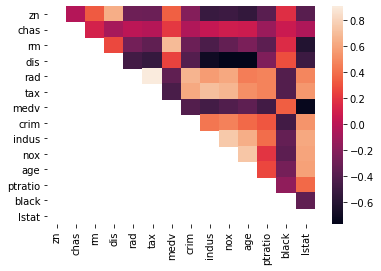

In [13]:
correlation_matrix = train.corr().where(~np.tril(np.ones(train.corr().shape)).astype(np.bool))
correlation_matrix
sns.heatmap(correlation_matrix)
plt.show()

In [14]:
correlation_table = correlation_matrix.stack().to_frame().reset_index()
correlation_table['corr_columns'] = correlation_table['level_0'] + ' - ' + correlation_table['level_1']
correlation_table = correlation_table.drop(columns=['level_0', 'level_1'])
correlation_table['values'] = correlation_table[0]
correlation_table = correlation_table[['corr_columns', 'values']]
deltacorr = 0.5
filter_1 = correlation_table['values'] > deltacorr
filter_2 = correlation_table['values'] < -deltacorr

correlation_table_1 = correlation_table.where(filter_1 | filter_2).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_1

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
nox - age,0.736000
tax - indus,0.708313
rm - medv,0.689598
tax - nox,0.670722
rad - crim,0.666636
indus - age,0.638378
zn - dis,0.637142


In [15]:
correlation_table_cols = correlation_table_1.index.str.split(expand=True).to_frame().reset_index(drop=True)[[0,2]]

col1 = set(correlation_table_cols[0])
col2 = set(correlation_table_cols[2])
col1 |= col2

correlated_cols = list(col1)
train_cols = list(train.columns)

print(correlated_cols)
print(len(correlated_cols))

print(train_cols)
print(len(train_cols))

['rm', 'tax', 'zn', 'crim', 'dis', 'rad', 'lstat', 'age', 'indus', 'nox', 'medv']
11
['zn', 'chas', 'rm', 'dis', 'rad', 'tax', 'medv', 'crim', 'indus', 'nox', 'age', 'ptratio', 'black', 'lstat']
14


Podemos ver como tenemos un modelo altamente correlacionado, donde 11 de las 14 columnas que tenemos disponibles para realizar las predicciones presentan una correlación superior al 0,5 (catalogada como alta) con almenos una del resto de columnas.
    
Debido a los valores obtenido augmentaremos nuestro threshold de selección de 0,5 a 0,75.

In [16]:
deltacorr = 0.75
filter_3 = correlation_table['values'] > deltacorr
filter_4 = correlation_table['values'] < -deltacorr

correlation_table_2 = correlation_table.where(filter_3 | filter_4).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_2

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
dis - age,-0.764208
dis - nox,-0.769364


Dadas las siguientes correlaciones decidimos prescindir de las columnas:
* tax, ya que presenta mayor correlación con otras columnas que rad
* age y nox, ya que ambas esta correlacionadas con dis, nox esta correlacionada con indus y ambas presentan un 0.73 de correlación entre ellas (se escapa del threshold definido pero es una correlación notable)

In [17]:
train = train.drop(columns = ["tax", "nox", "age"])
train.head()

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43


## ¿Que metodo es?

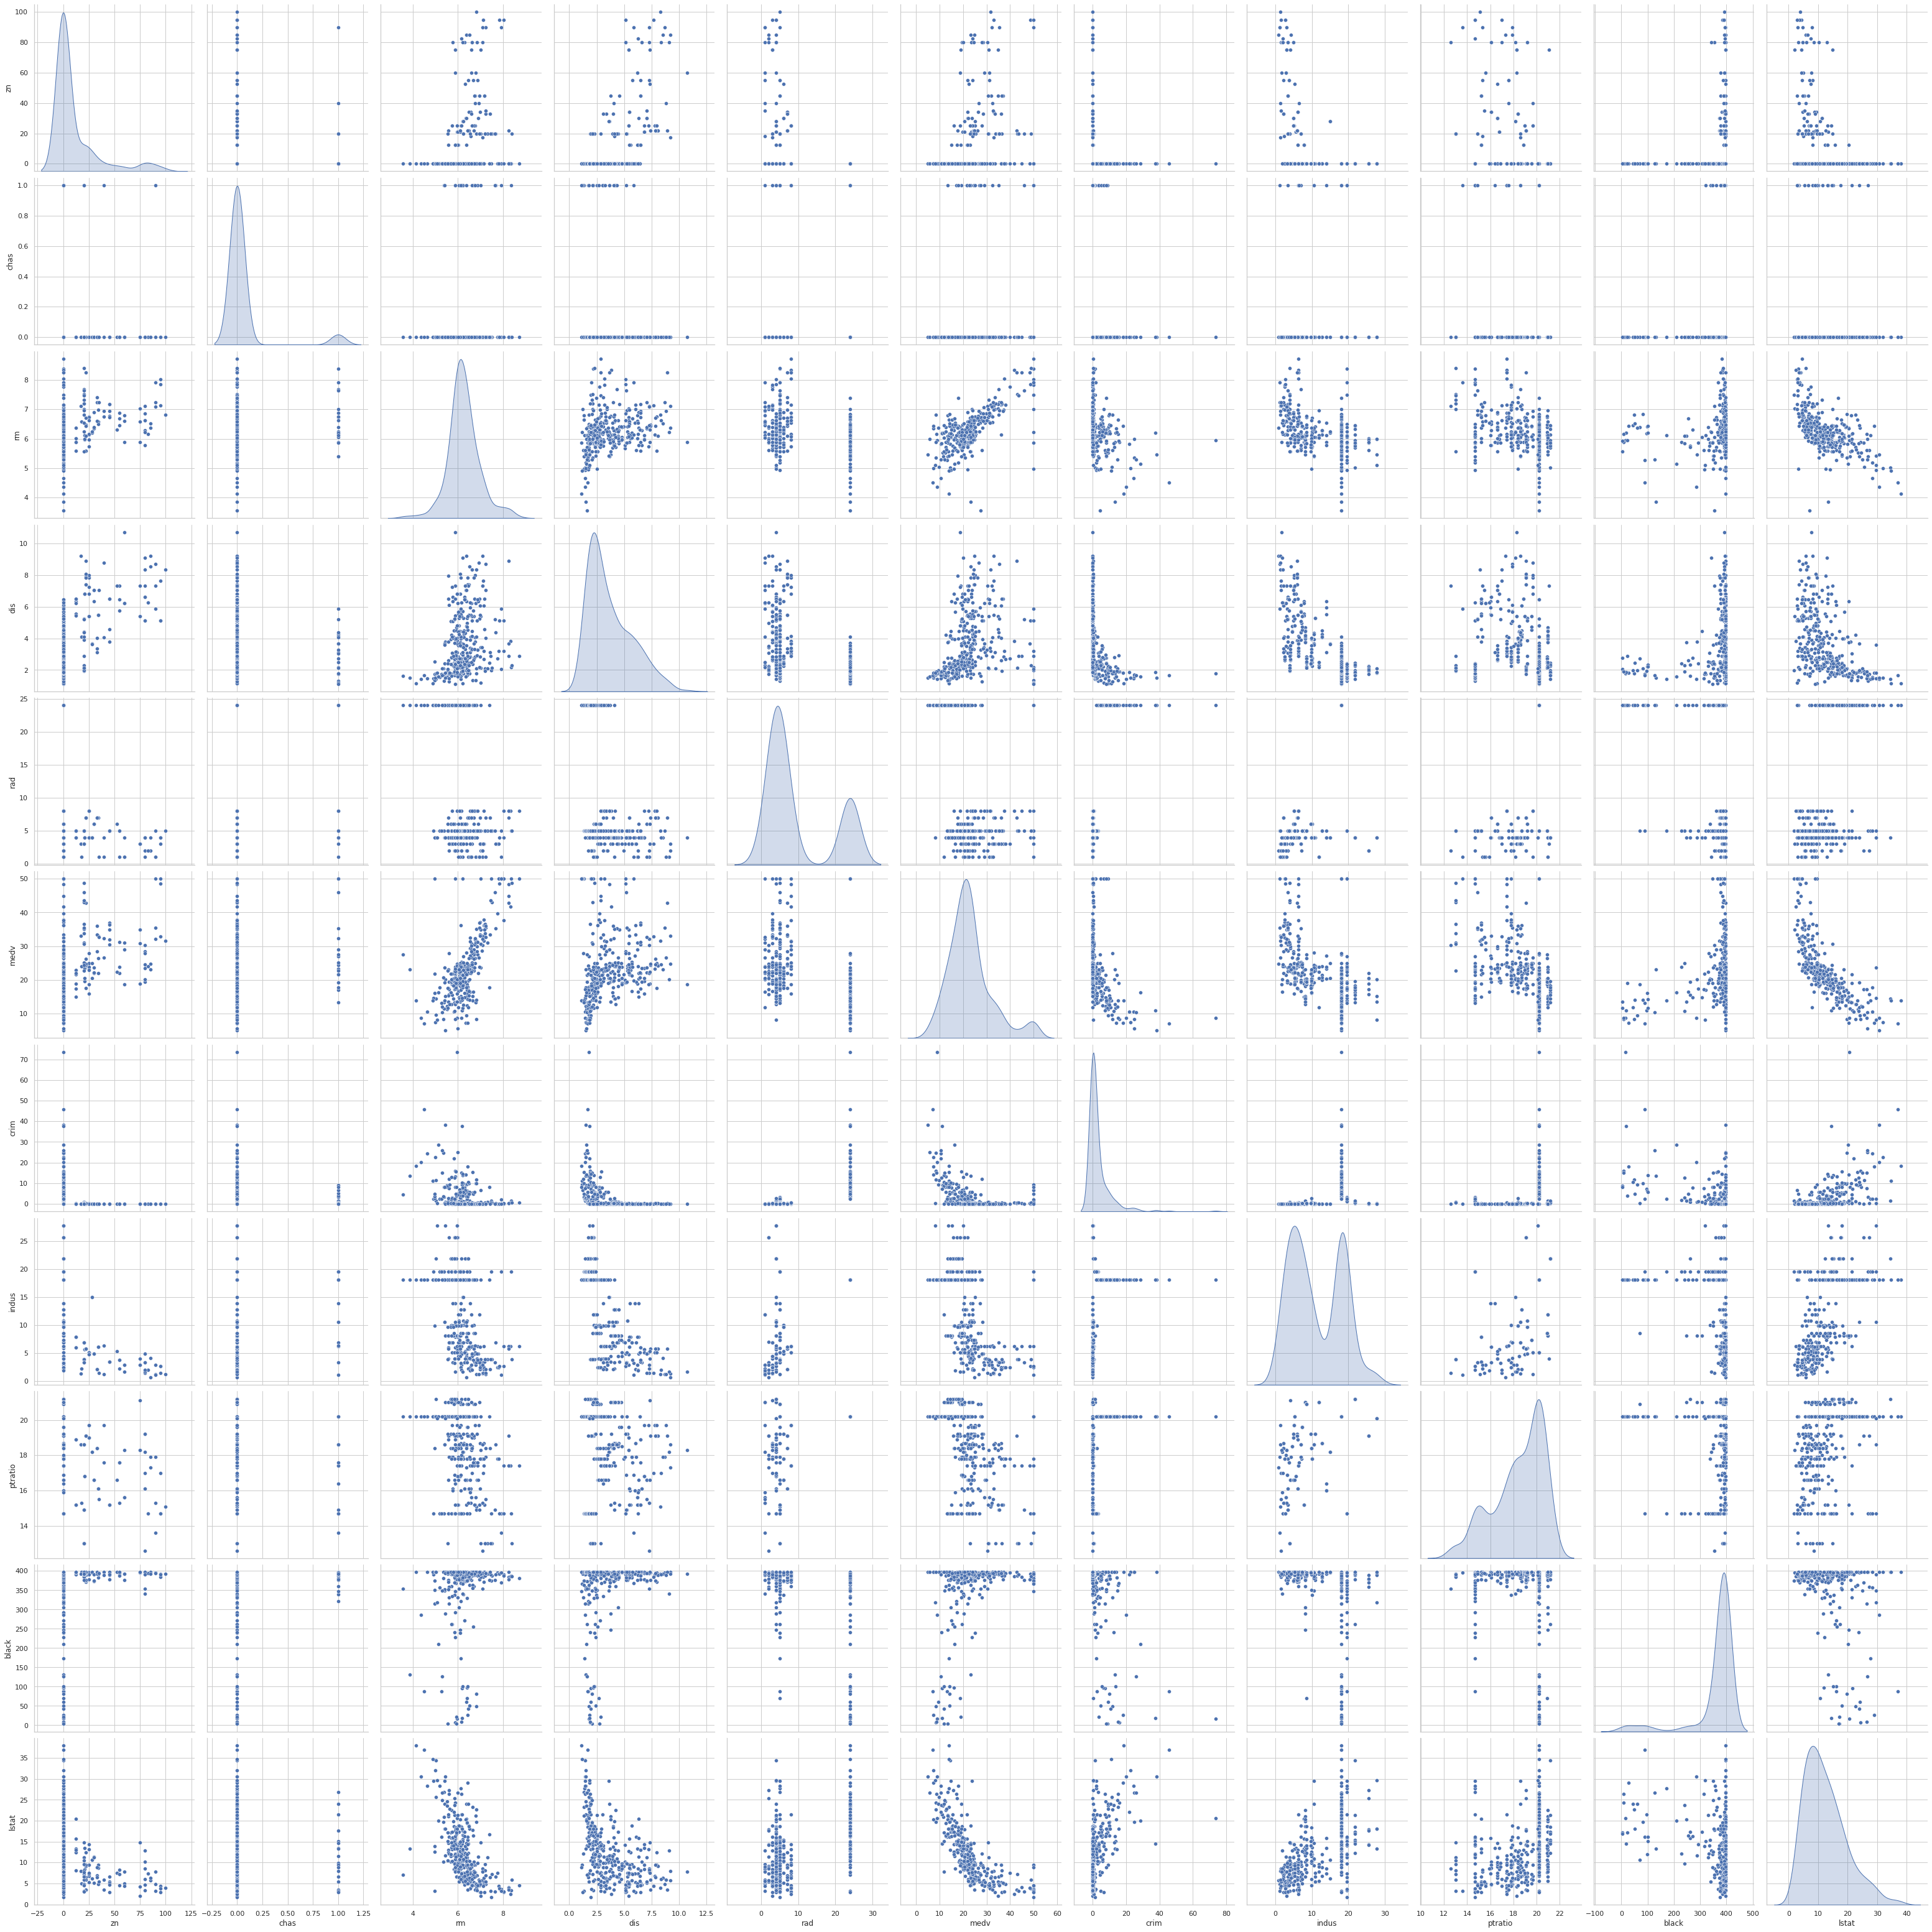

In [18]:
sns.set(style='whitegrid', color_codes=True)
quantitative_plots = sns.pairplot(train, height=4, diag_kind='kde')

# 4.- Limpieza de datos

/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartin

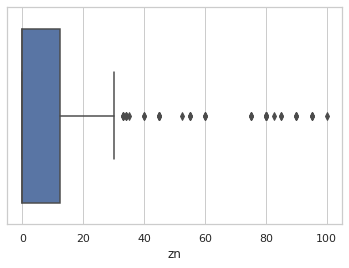

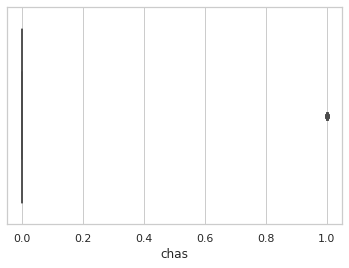

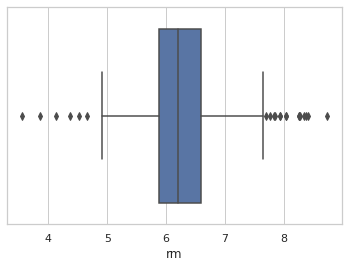

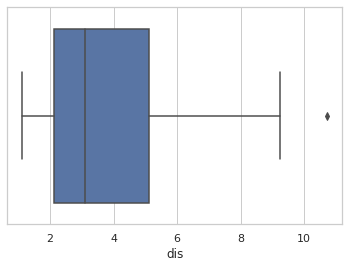

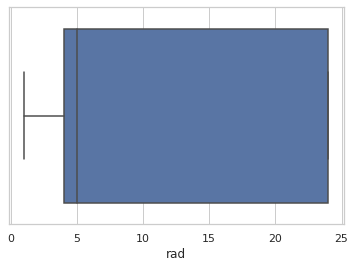

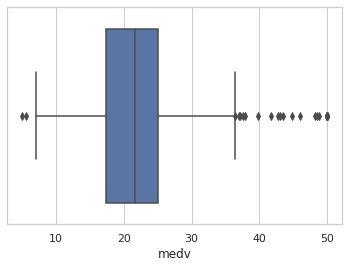

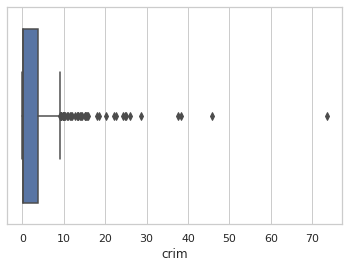

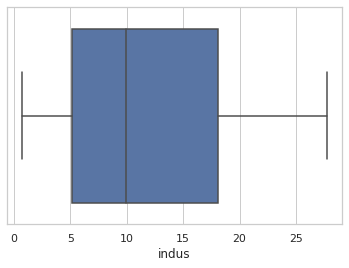

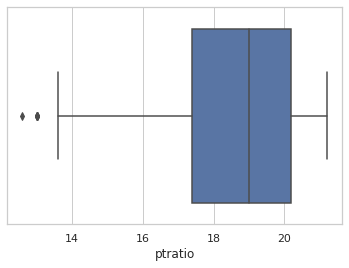

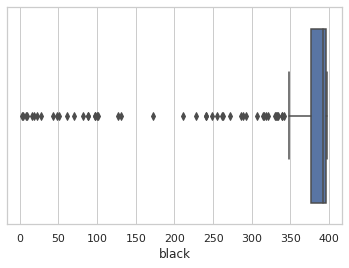

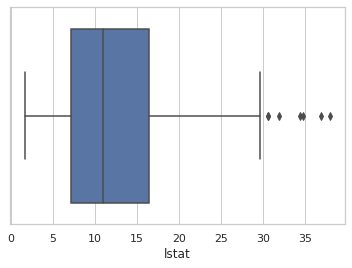

In [19]:
for col in train.columns:
  f, ax_new = plt.subplots(1)
  sns.boxplot(train[col], ax=ax_new)

# 4.- Limpieza de datos

## Outliers

In [20]:
# Ahora empezamos a eliminar outliers
# Segun el analisis con los Boxplot's, existe una gran cantidad de outliers en las variables "zn"(hacia el max),
# "crim" (hacia el max) y "black" (hacia el min).

meanzn = train['zn'].describe()['mean']
stdzn = train['zn'].describe()['std']
meancrim = train['crim'].describe()['mean']
stdcrim = train['crim'].describe()['std']
meanblack = train['black'].describe()['mean']
stdblack = train['black'].describe()['std']

n = 3 # aca se define la cantidad de sigmas a evaluar

train = train[train['zn']< (meanzn+n*stdzn)] # Se eliminan outliers de 'zn'
train = train[train['crim']< (meancrim+n*stdcrim)] # Se eliminan outliers de 'zn'
train = train[train['black']> (meanblack-n*stdblack)] # Se eliminan outliers de 'zn'
train

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0,5.569,2.3999,6,17.5,0.17783,9.69,19.2,395.77,15.10
329,0.0,0,6.593,2.4786,1,22.4,0.06263,11.93,21.0,391.99,9.67
330,0.0,0,6.120,2.2875,1,20.6,0.04527,11.93,21.0,396.90,9.08
331,0.0,0,6.976,2.1675,1,23.9,0.06076,11.93,21.0,396.90,5.64


# 5.- Entrenar al modelo supervisado de regresion

## Modelo de regresión lineal

In [21]:
train.head()

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43


In [22]:
target = train.pop('medv')
target

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 295, dtype: float64

In [23]:
features = StandardScaler().fit_transform(train)
features

array([[ 0.72667061, -0.26237488,  0.46588746, ..., -1.49654557,
         0.45428722, -1.08704826],
       [-0.47240364, -0.26237488,  0.24475714, ..., -0.31447172,
         0.45428722, -0.46601952],
       [-0.47240364, -0.26237488,  1.07327788, ...,  0.11107487,
         0.39955594, -1.3915912 ],
       ...,
       [-0.47240364, -0.26237488, -0.18745212, ...,  1.19858282,
         0.45428722, -0.47497667],
       [-0.47240364, -0.26237488,  1.04168783, ...,  1.19858282,
         0.45428722, -0.98851966],
       [-0.47240364, -0.26237488, -0.31668412, ...,  1.19858282,
         0.45428722, -0.65411957]])

In [24]:
lr = LinearRegression()
modelo_lr = lr.fit(features, target)

In [25]:
modelo_lr.score(features, target)

0.6751328897935748

## Regression polinomial

In [26]:
for n in range(2,10):
    X_poly = PolynomialFeatures(degree=int(n)).fit_transform(train)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, target.values)
    y_pred = lin_reg.predict(X_poly)
    
    print("Degree " + str(n))
    print(r2_score(target, y_pred))
    print('\n')

Degree 2
0.2923581474974509


Degree 3
0.9889768582181921


Degree 4
1.0


Degree 5
1.0


Degree 6
0.9999999999996222


Degree 7
0.9999999999997259


Degree 8
1.0


Degree 9
0.9999999999999999




## Random Forest

## Neural Net